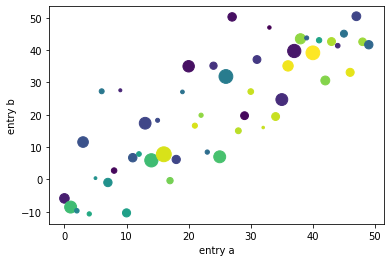

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

# x, y, c : color, s : size
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

(432693, 3)


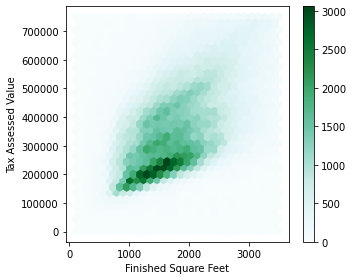

In [3]:
# 산점도는 데이터가 많을 경우, 데이터가 어디에 밀집되어있는지 보기 어렵다.
# 위치별 밀집여부를 보여줌
kc_tax = pd.read_csv("../data/kc_tax.csv.gz")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

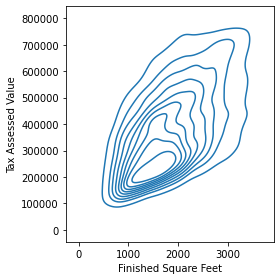

In [4]:
# 산점도를 밀도별로 등고선 형식으로 보여줌. 밀도가 높은 곳이 가장 높은 곳으로 표시됨

fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

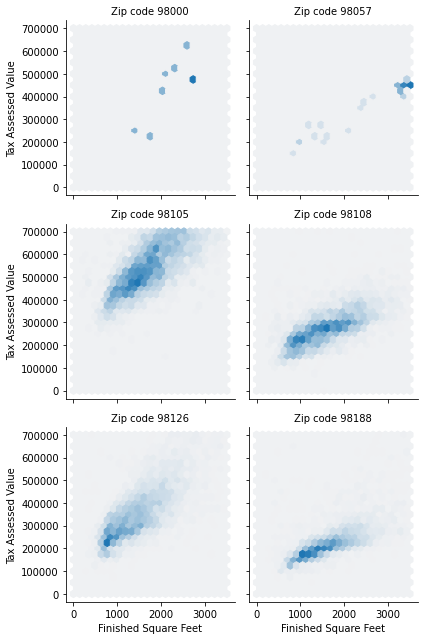

In [5]:
# SqFtTotLiving와, TaxAssessedValue 컬럼의 상관계수를 구하는데, 어느정도 상관 관계가 있어 보인다.
# 하지만, 맞지 않는 부분도 있어, 외부 요인이 존재하지는지 파악하려고 한다.
# ZipCode로 groupby했을 때의 상관 관계를 구하고, 그 중 일부 ZipCode의 분포도를 확인하기.

def show_hexbin_groupby(df, x, y, group_col, x_label=None, y_label=None, group_label=None):
    if x_label is None:
        x_label = x
    if y_label is None:
        y_label = y
    if group_label is None:
        group_label = group_col

    def hexbin(x, y, color, **kwargs):
        cmap = sns.light_palette(color, as_cmap=True)
        plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

    g = sns.FacetGrid(df, col=group_col, col_wrap=2)
    g.map(hexbin, x, y,
          extent=[0, 3500, 0, 700000])
    g.set_axis_labels(x_label, y_label)
    g.set_titles(group_label + ' {col_name:.0f}')

    plt.tight_layout()
    plt.show()

zip_codes = [98188, 98105, 98108, 98126, 98000, 98057]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]

show_hexbin_groupby(kc_tax_zip, 'SqFtTotLiving', 'TaxAssessedValue', 'ZipCode', 'Finished Square Feet', 'Tax Assessed Value', 'Zip code')